In [16]:
import pandas as pd
df = pd.read_csv("air1.csv")

In [17]:
df = df.drop(columns=["Message"])
df.columns = ["id", "pollutant_code", "pollutant", "measure_type", "unit",
              "cd_code", "location_code", "location", "period", "start_date", "value"]
print(df.head())

       id  pollutant_code               pollutant measure_type unit cd_code  \
0  336867             375  Nitrogen dioxide (NO2)         Mean  ppb      CD   
1  336741             375  Nitrogen dioxide (NO2)         Mean  ppb      CD   
2  550157             375  Nitrogen dioxide (NO2)         Mean  ppb      CD   
3  412802             375  Nitrogen dioxide (NO2)         Mean  ppb      CD   
4  412803             375  Nitrogen dioxide (NO2)         Mean  ppb      CD   

   location_code                           location               period  \
0            407      Flushing and Whitestone (CD7)       Winter 2014-15   
1            107              Upper West Side (CD7)       Winter 2014-15   
2            414  Rockaway and Broad Channel (CD14)  Annual Average 2017   
3            407      Flushing and Whitestone (CD7)       Winter 2015-16   
4            407      Flushing and Whitestone (CD7)          Summer 2016   

   start_date  value  
0  12/01/2014  23.97  
1  12/01/2014  27.42  

In [18]:
df["date"] = pd.to_datetime(df["start_date"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")


In [19]:
missing = df.isna().sum()
print(missing)

id                0
pollutant_code    0
pollutant         0
measure_type      0
unit              0
cd_code           0
location_code     0
location          0
period            0
start_date        0
value             0
date              0
dtype: int64


In [20]:
before = df.shape[0]

# Drop rows where any of the subset columns have missing values
df = df.dropna()

after = df.shape[0]
dropped = before - after

print(f"Rows dropped: {dropped}")


Rows dropped: 0


In [21]:
# Extract year
df["year"] = df["period"].str.extract(r"(\d{4})").astype(int)

# Extract season
df["season"] = df["period"].str.extract(r"(Winter|Summer|Annual)", expand=False)

print(df[["period", "year", "season"]].head())


                period  year  season
0       Winter 2014-15  2014  Winter
1       Winter 2014-15  2014  Winter
2  Annual Average 2017  2017  Annual
3       Winter 2015-16  2015  Winter
4          Summer 2016  2016  Summer


In [22]:
df["pollutant"] = df["pollutant"].str.replace("Fine particles \\(PM 2.5\\)", "PM2.5", regex=True)
df["pollutant"] = df["pollutant"].str.replace("Nitrogen dioxide \\(NO2\\)", "NO2", regex=True)

print(df.head())

       id  pollutant_code pollutant measure_type unit cd_code  location_code  \
0  336867             375       NO2         Mean  ppb      CD            407   
1  336741             375       NO2         Mean  ppb      CD            107   
2  550157             375       NO2         Mean  ppb      CD            414   
3  412802             375       NO2         Mean  ppb      CD            407   
4  412803             375       NO2         Mean  ppb      CD            407   

                            location               period  start_date  value  \
0      Flushing and Whitestone (CD7)       Winter 2014-15  12/01/2014  23.97   
1              Upper West Side (CD7)       Winter 2014-15  12/01/2014  27.42   
2  Rockaway and Broad Channel (CD14)  Annual Average 2017  01/01/2017  12.55   
3      Flushing and Whitestone (CD7)       Winter 2015-16  12/01/2015  22.63   
4      Flushing and Whitestone (CD7)          Summer 2016  06/01/2016  14.00   

        date  year  season  
0 2014-12

In [23]:
pm25_only = df[df["pollutant"] == "PM2.5"]
no2_only = df[df["pollutant"] == "NO2"]

print(pm25_only.head())
print(no2_only.head())

        id  pollutant_code pollutant measure_type    unit cd_code  \
18  170430             365     PM2.5         Mean  mcg/m3      CD   
19  410984             365     PM2.5         Mean  mcg/m3      CD   
20  742558             365     PM2.5         Mean  mcg/m3      CD   
21  169393             365     PM2.5         Mean  mcg/m3      CD   
22  169452             365     PM2.5         Mean  mcg/m3      CD   

    location_code                           location               period  \
18            307                  Sunset Park (CD7)  Annual Average 2013   
19            107              Upper West Side (CD7)       Winter 2015-16   
20            414  Rockaway and Broad Channel (CD14)       Winter 2020-21   
21            414  Rockaway and Broad Channel (CD14)          Summer 2010   
22            414  Rockaway and Broad Channel (CD14)          Summer 2011   

    start_date      value       date  year  season  
18  12/01/2012   9.180000 2012-12-01  2013  Annual  
19  12/01/2015  

## Creating a dataframe just with the pollutants and without the deaths etc.

In [24]:
selected_pollutants = [
    'NO2', 'PM2.5', 'Boiler Emissions - Total SO2 Emissions', 'Ozone (O3)',
    'Boiler Emissions - Total NOx Emissions', 'Boiler Emissions - Total PM2.5 Emissions',
    'Outdoor Air Toxics - Formaldehyde', 'Outdoor Air Toxics - Benzene',
]

# 2. Filter your DataFrame to include only the selected pollutants.
pollutants_df = df[df['pollutant'].isin(selected_pollutants)]

# 3. Print the filtered DataFrame
print(pollutants_df)

selected_plot_df = pollutants_df[['pollutant', 'year', 'value', 'location_code']].copy() # Create a copy to avoid modifying the original DataFrame

           id  pollutant_code   pollutant measure_type unit cd_code  \
0      336867             375         NO2         Mean  ppb      CD   
1      336741             375         NO2         Mean  ppb      CD   
2      550157             375         NO2         Mean  ppb      CD   
3      412802             375         NO2         Mean  ppb      CD   
4      412803             375         NO2         Mean  ppb      CD   
...       ...             ...         ...          ...  ...     ...   
18857  165993             375         NO2         Mean  ppb      CD   
18858  338255             386  Ozone (O3)         Mean  ppb      CD   
18859  651029             386  Ozone (O3)         Mean  ppb      CD   
18860  667628             375         NO2         Mean  ppb      CD   
18861  167586             375         NO2         Mean  ppb      CD   

       location_code                               location  \
0                407          Flushing and Whitestone (CD7)   
1                107 

## Creating a df with seasonal pollutants, we only have seasonal measurements for no2 and pm2.5, O3 has measurements only in summer

In [25]:
seasonal_pollutants = [
    'NO2', 'PM2.5',
]

# 2. Filter your DataFrame to include only the selected pollutants.
seasonal_df = df[df['pollutant'].isin(seasonal_pollutants)]  # Changed to your_df

# 3. Print the filtered DataFrame
print("Seasonal DataFrame:")
print(seasonal_df)
# ---Edits Above---


# Create a simplified DataFrame for plotting, using filtered data
# Corrected the line below to use the seasonal_df
seasonal_plot_df = seasonal_df[['pollutant', 'season', 'value', 'year']].copy() # Create a copy to avoid modifying the original DataFrame

Seasonal DataFrame:
           id  pollutant_code pollutant measure_type unit cd_code  \
0      336867             375       NO2         Mean  ppb      CD   
1      336741             375       NO2         Mean  ppb      CD   
2      550157             375       NO2         Mean  ppb      CD   
3      412802             375       NO2         Mean  ppb      CD   
4      412803             375       NO2         Mean  ppb      CD   
...       ...             ...       ...          ...  ...     ...   
18851  167763             375       NO2         Mean  ppb      CD   
18856  336740             375       NO2         Mean  ppb      CD   
18857  165993             375       NO2         Mean  ppb      CD   
18860  667628             375       NO2         Mean  ppb      CD   
18861  167586             375       NO2         Mean  ppb      CD   

       location_code                               location  \
0                407          Flushing and Whitestone (CD7)   
1                107     

Matplotlib is building the font cache; this may take a moment.


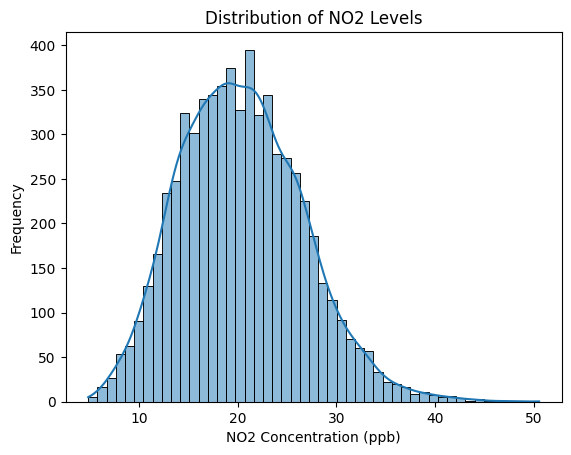

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution Plot for NO2 levels
sns.histplot(seasonal_plot_df[seasonal_plot_df['pollutant'] == 'NO2']['value'], kde=True)
plt.title('Distribution of NO2 Levels')
plt.xlabel('NO2 Concentration (ppb)')
plt.ylabel('Frequency')
plt.show()


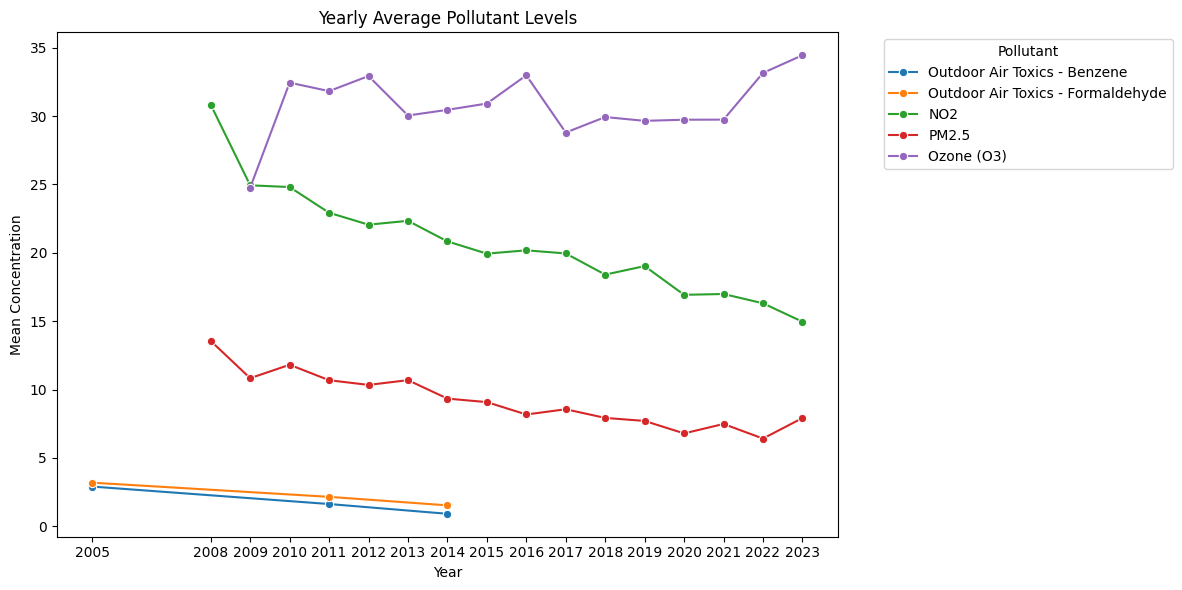

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'selected_plot_df' is your DataFrame
# Group by year and pollutant, then compute mean
grouped = selected_plot_df.groupby(['year', 'pollutant'])['value'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year', y='value', hue='pollutant', marker='o')
plt.title("Yearly Average Pollutant Levels")
plt.xlabel("Year")
plt.ylabel("Mean Concentration")
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.xticks(sorted(grouped['year'].unique()))
plt.tight_layout()
plt.show()

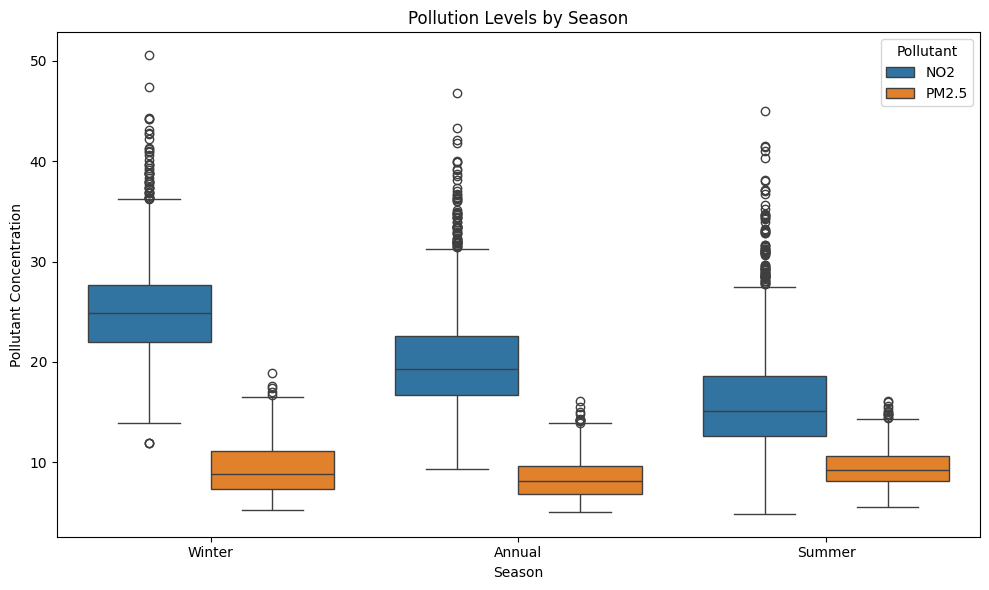

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=seasonal_plot_df, x="season", y="value", hue="pollutant")
plt.title("Pollution Levels by Season")
plt.ylabel("Pollutant Concentration")
plt.xlabel("Season")
plt.legend(title="Pollutant")
plt.tight_layout()
plt.show()


Winter has elevated NO2 levels: This could be attributed to factors like increased heating activities (burning of fossil fuels) and potentially less atmospheric dispersion due to weather conditions (e.g., temperature inversions).
Summer has lower pollution levels: Warmer weather often leads to better atmospheric mixing and dispersion of pollutants. Reduced heating needs also contribute to lower emissions.
PM2.5 follows a similar but less pronounced seasonal pattern: While PM2.5 levels are generally lower than NO2, they also tend to be higher in winter and lower in summer.

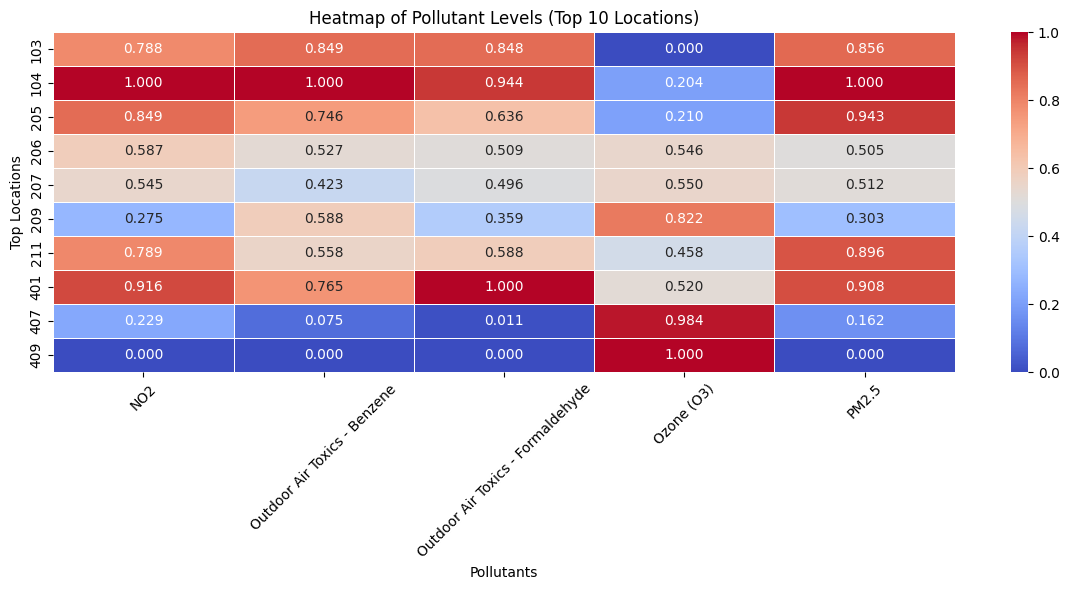

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Find the top 10 most frequent locations
top_locations = selected_plot_df['location_code'].value_counts().head(10).index

# Step 2: Filter the original dataframe
filtered_df = selected_plot_df[selected_plot_df['location_code'].isin(top_locations)]

# Step 3: Pivot for heatmap
heatmap_data = filtered_df.pivot_table(values='value', 
                                       index='location_code', 
                                       columns='pollutant', 
                                       aggfunc='mean')

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(heatmap_data)
normalized_df = pd.DataFrame(normalized_data, index=heatmap_data.index, columns=heatmap_data.columns)


# Step 4: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_df, cmap="coolwarm", annot=True, fmt=".3f", linewidths=0.5)
plt.title('Heatmap of Pollutant Levels (Top 10 Locations)')
plt.xlabel('Pollutants')
plt.ylabel('Top Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#for easier comparison should we scale the numbers or sth


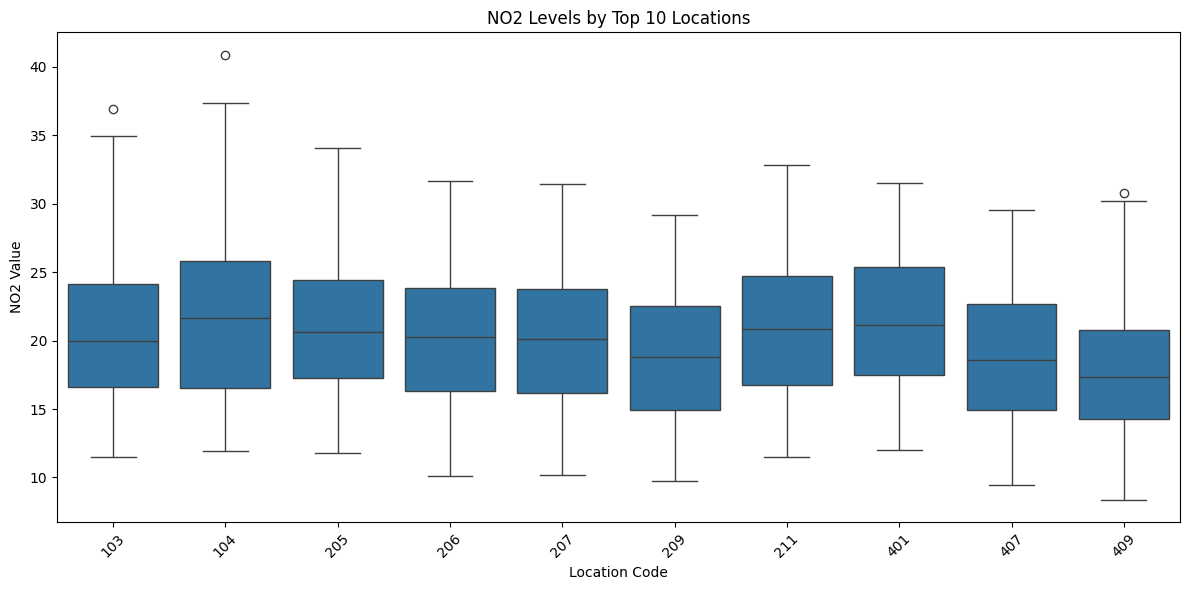

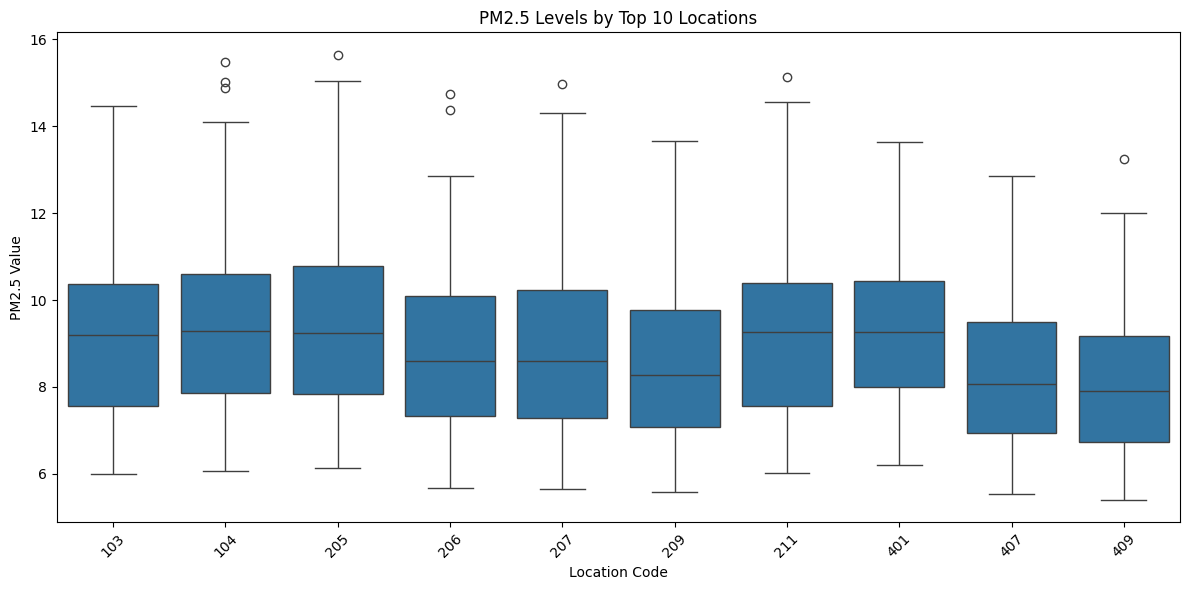

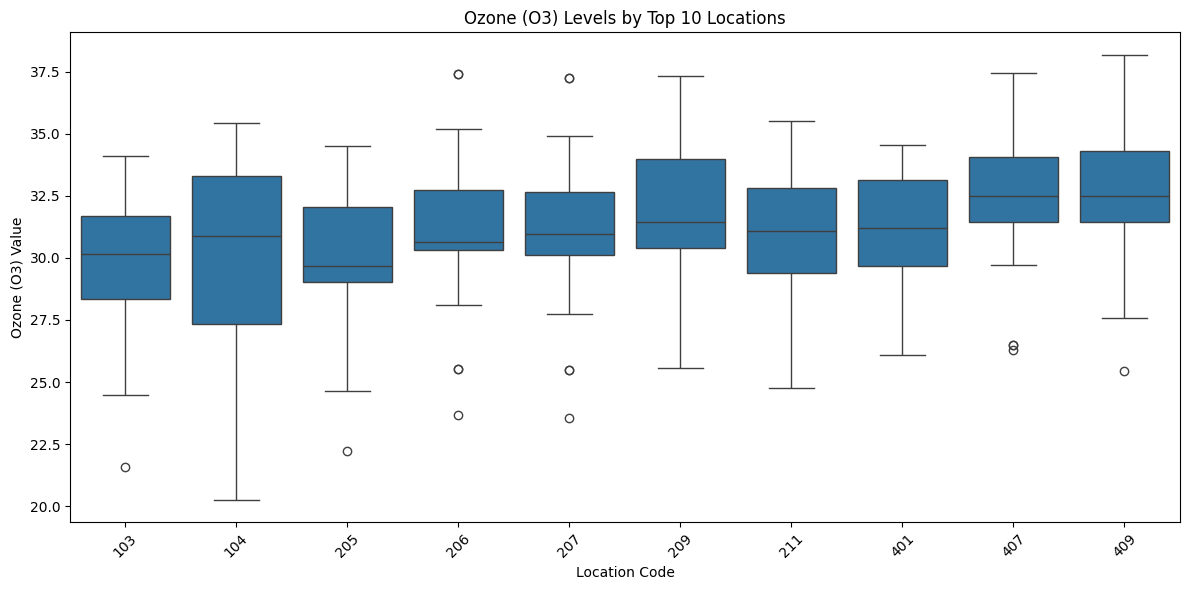

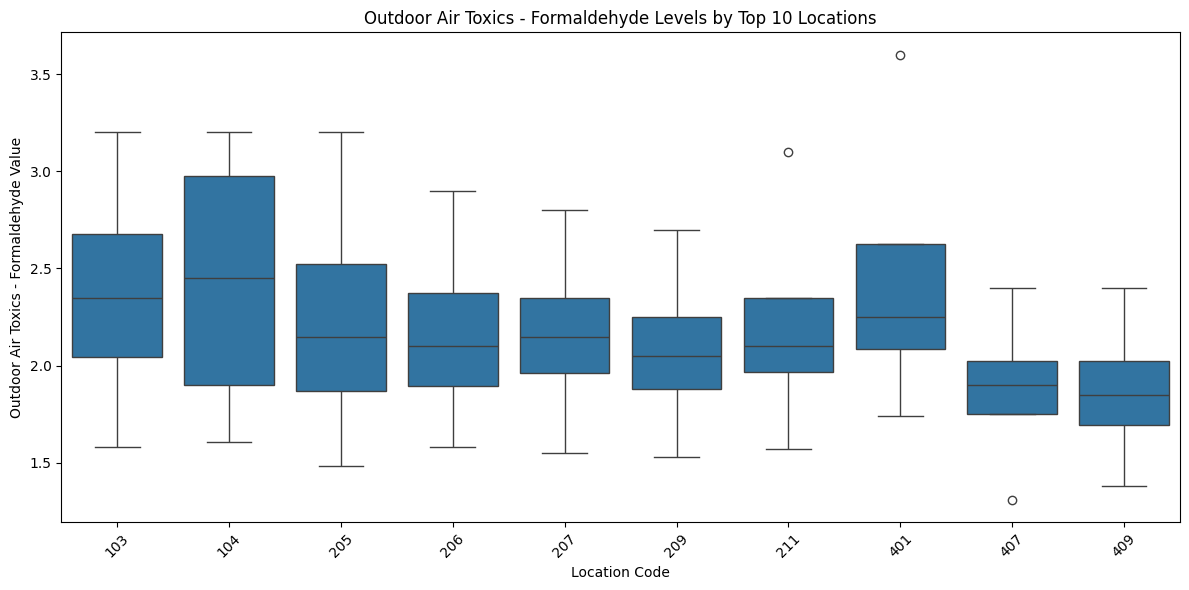

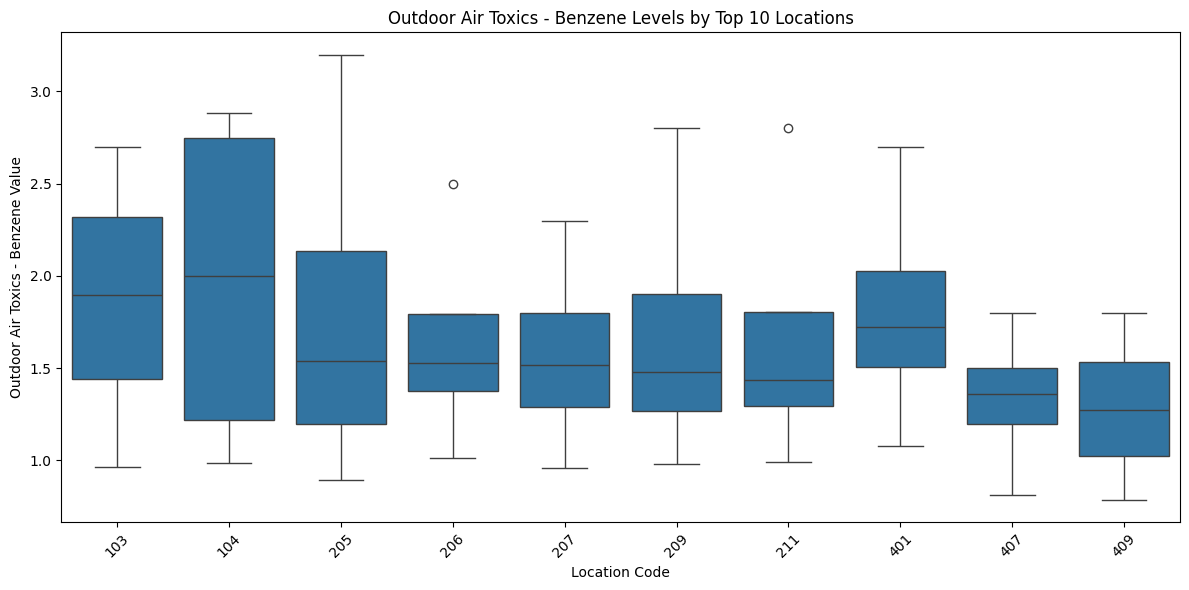

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Find top 10 most frequent locations
top_locations = selected_plot_df['location_code'].value_counts().head(10).index

# Step 2: Filter the DataFrame
filtered_df = selected_plot_df[selected_plot_df['location_code'].isin(top_locations)]

# Step 3: Loop through each pollutant and create box plots
pollutants = filtered_df['pollutant'].unique()

for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=filtered_df[filtered_df['pollutant'] == pollutant], 
        x='location_code', 
        y='value'
    )
    plt.title(f'{pollutant} Levels by Top 10 Locations')
    plt.xlabel('Location Code')
    plt.ylabel(f'{pollutant} Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


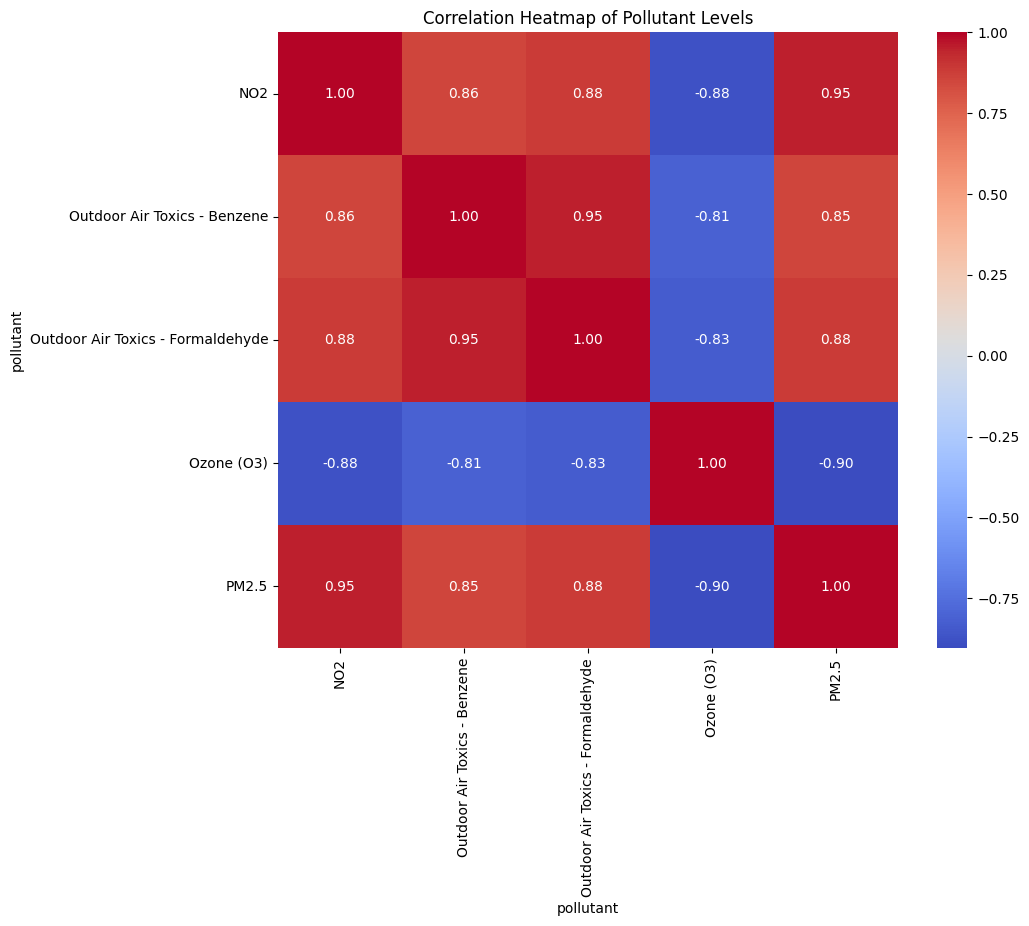

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot data to create a correlation matrix
corr_df = selected_plot_df.pivot_table(index='location_code', columns='pollutant', values='value')

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Pollutant Levels')
plt.show()


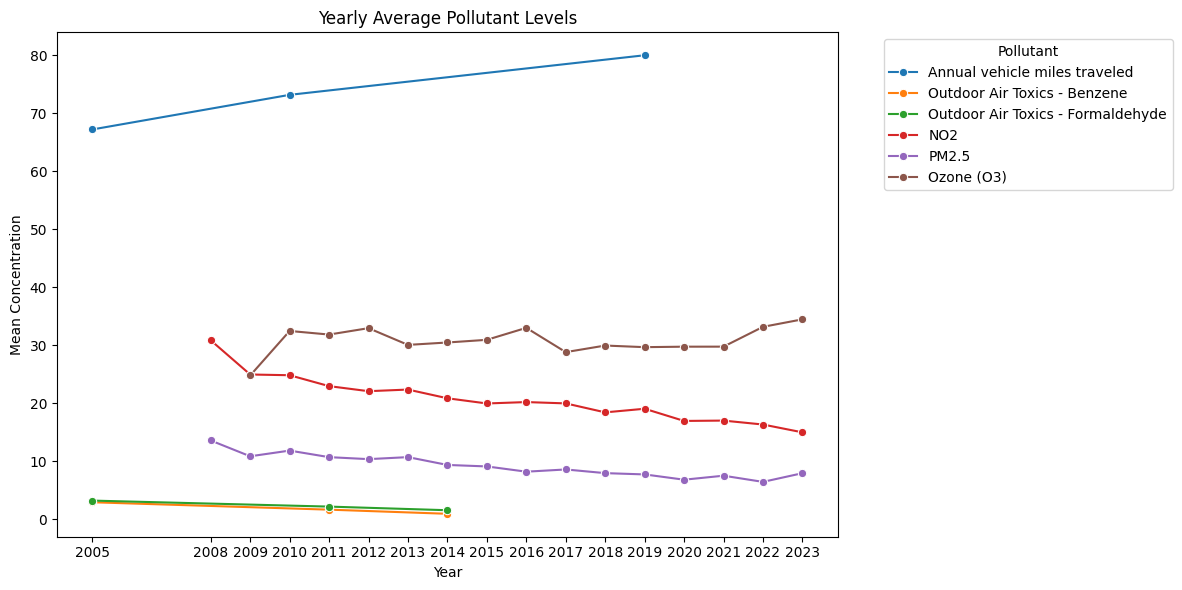

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'selected_plot_df' is your DataFrame
# Group by year and pollutant, then compute mean
selected_pollutants = [
    'NO2', 'PM2.5', 'Boiler Emissions - Total SO2 Emissions', 'Ozone (O3)',
    'Boiler Emissions - Total NOx Emissions', 'Boiler Emissions - Total PM2.5 Emissions',
    'Outdoor Air Toxics - Formaldehyde', 'Outdoor Air Toxics - Benzene','Annual vehicle miles traveled',
]

# Filter the DataFrame
plot_df = df[df['pollutant'].isin(selected_pollutants)][['year', 'pollutant', 'value']].copy()

grouped = plot_df.groupby(['year', 'pollutant'])['value'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year', y='value', hue='pollutant', marker='o')
plt.title("Yearly Average Pollutant Levels")
plt.xlabel("Year")
plt.ylabel("Mean Concentration")
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.xticks(sorted(grouped['year'].unique()))
plt.tight_layout()
plt.show()

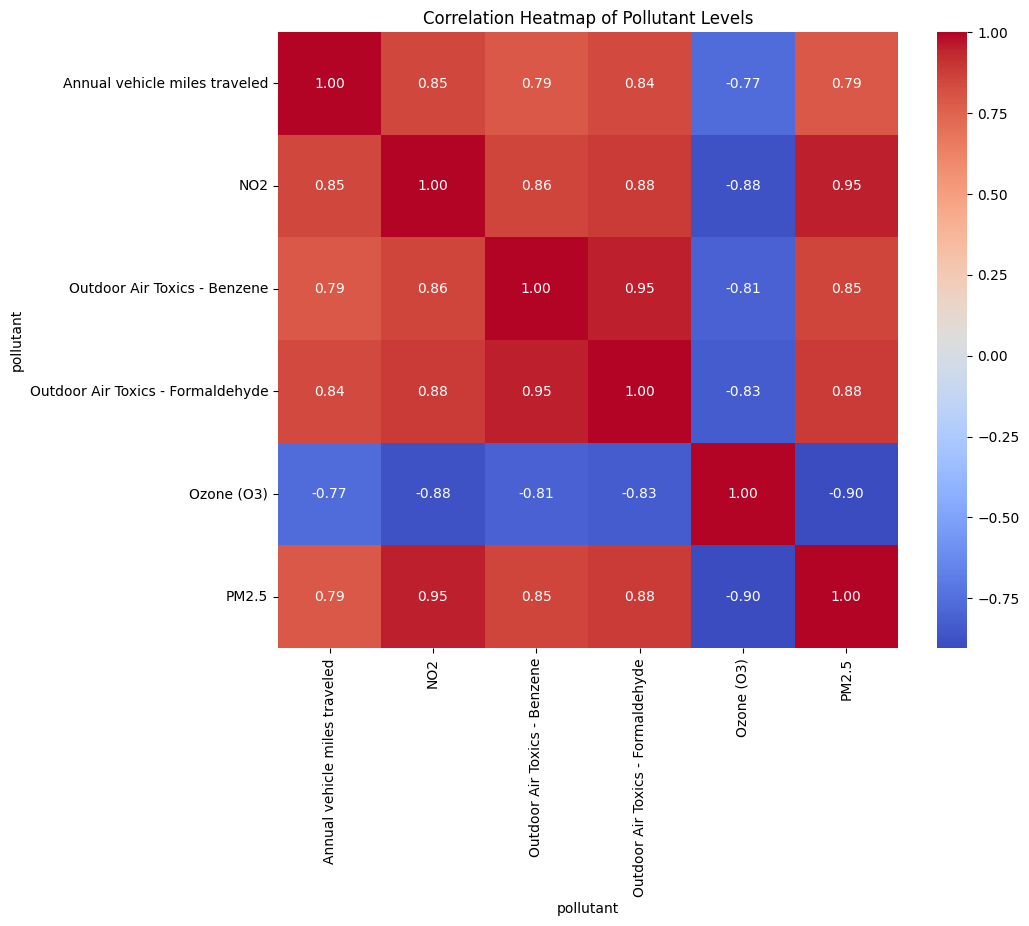

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_pollutants = [
    'NO2', 'PM2.5', 'Boiler Emissions - Total SO2 Emissions', 'Ozone (O3)',
    'Boiler Emissions - Total NOx Emissions', 'Boiler Emissions - Total PM2.5 Emissions',
    'Outdoor Air Toxics - Formaldehyde', 'Outdoor Air Toxics - Benzene','Annual vehicle miles traveled',
]

# Filter the DataFrame
plot_df = df[df['pollutant'].isin(selected_pollutants)][['year', 'pollutant', 'value', 'location_code']].copy()


corr_df = plot_df.pivot_table(index='location_code', columns='pollutant', values='value')

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Pollutant Levels')
plt.show()

In [34]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# selected_pollutants = [
#     'NO2', 'PM2.5', 'Boiler Emissions - Total SO2 Emissions', 'Ozone (O3)',
#     'Boiler Emissions - Total NOx Emissions', 'Boiler Emissions - Total PM2.5 Emissions',
#     'Outdoor Air Toxics - Formaldehyde', 'Outdoor Air Toxics - Benzene',
# ]
# # Filter the main dataframe to include only the selected pollutants
# selected_rows = df[df['pollutant_code'] == 643]

# print(selected_rows)

# merged_df = pd.merge(selected_plot_df, selected_rows, on='year')  
# print(merged_df.columns)
# print(merged_df)
# # Set up the plot
# plt.figure(figsize=(14, 10))

# # Create scatter plots for each pollutant
# for i, pollutant in enumerate(selected_pollutants, 1):
#     plt.subplot(3, 3, i)  # Adjust the grid size based on number of pollutants
#     sns.scatterplot(data=merged_df, 
#                     x='value_x', y='value_y', label=pollutant)
#     plt.title(f'{pollutant} vs Traffic Miles')
#     plt.xlabel('Miles of Traffic')
#     plt.ylabel('Pollutant Level')
#     plt.xticks(rotation=45)

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()


In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# selected_pollutants = [
#     'NO2', 'PM2.5', 'Boiler Emissions - Total SO2 Emissions', 'Ozone (O3)',
#     'Boiler Emissions - Total NOx Emissions', 'Boiler Emissions - Total PM2.5 Emissions',
#     'Outdoor Air Toxics - Formaldehyde', 'Outdoor Air Toxics - Benzene',
# ]

# # Filter the main dataframe to include only the selected pollutants
# selected_rows = df[df['pollutant_code'] == 643]

# # Merge the dataframes
# merged_df = pd.merge(selected_plot_df, selected_rows, on='year')

# # Check columns in the merged dataframe
# print(merged_df.columns)
# print(merged_df.head())

# # Set up the plot size
# plt.figure(figsize=(14, 10))

# # Create density plots for each pollutant
# for i, pollutant in enumerate(selected_pollutants, 1):
#     plt.subplot(3, 3, i)  # Adjust the grid size based on number of pollutants
#     sns.kdeplot(data=merged_df, x='value_x', y='value_y', fill=True, cmap='viridis', alpha=0.6)
#     plt.title(f'Density of {pollutant} vs Traffic Miles')
#     plt.xlabel('Miles of Traffic')
#     plt.ylabel(f'{pollutant} Level')

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()
